# Explorando Dados

Neste projeto, vamos trabalhar com dados da __"Pesquisa de Finanças dos Consumidores"__ | __"Survey of Consumer Finances"__ (SCF). A SCF é uma pesquisa patrocinada pelo Federal Reserve dos EUA. Ela acompanha informações financeiras, demográficas e de opinião sobre as famílias nos Estados Unidos. A pesquisa é realizada a cada três anos, e trabalharemos com um extrato dos resultados de 2019.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preparando Dados

## Importação

Primeiro, precisamos carregar os dados, que estão armazenados em um arquivo CSV compactado: `SCFP2019.csv.gz`. No último projeto, você aprendeu como descompactar arquivos usando `gzip` e a linha de comando. No entanto, a função `read_csv` do pandas pode trabalhar diretamente com arquivos compactados.

### Exercício:
Leia o arquivo `"data/SCFP2019.csv.gz"` no DataFrame `df`.

In [ ]:
df =
print("df type:", type(df))
print("df shape:", df.shape)
df.head()

Uma das primeiras coisas que você pode notar aqui é que este conjunto de dados é ENORME — mais de 20.000 linhas e 351 colunas! MUITOS DADOS!!! Não teremos tempo de explorar todas as características deste conjunto de dados, mas você pode consultar o __*dicionário de dados*__ deste projeto para obter detalhes.

Por enquanto, vamos apenas dizer que este conjunto de dados rastreia vários tipos de comportamentos relacionados às formas como as famílias ganham, economizam e gastam dinheiro nos Estados Unidos.

Para este projeto, vamos focar nas famílias que "foram negadas crédito ou temeram ser negadas crédito nos últimos 5 anos." Essas famílias são identificadas na coluna `"TURNFEAR"`.

### Exercício:
Use uma `máscara` para subdefinir e criar `df` apenas para famílias que foram negadas ou temeram ser negadas crédito (`"TURNFEAR" == 1`). Atribua esse subconjunto à variável `df_fear`.

In [ ]:
mask = ...
df_fear = ...
print("df_fear type:", type(df_fear))
print("df_fear shape:", df_fear.shape)
df_fear.head()

## Explorar

### IDADE

Agora que temos nosso subconjunto, vamos explorar as características desse grupo. Uma das características é o grupo etário (`"AGECL"`).

### Exercício:
Crie uma lista `age_groups` com os valores únicos na coluna `"AGECL"`. Em seguida, revise a entrada para `"AGECL"` no Livro de Códigos para determinar o que os valores representam.

In [ ]:
age_groups = ...
print("Age Groups:", age_groups)

Observando o Livro de Códigos, podemos ver que `"AGECL"` representa dados categóricos, embora os valores na coluna sejam numéricos.

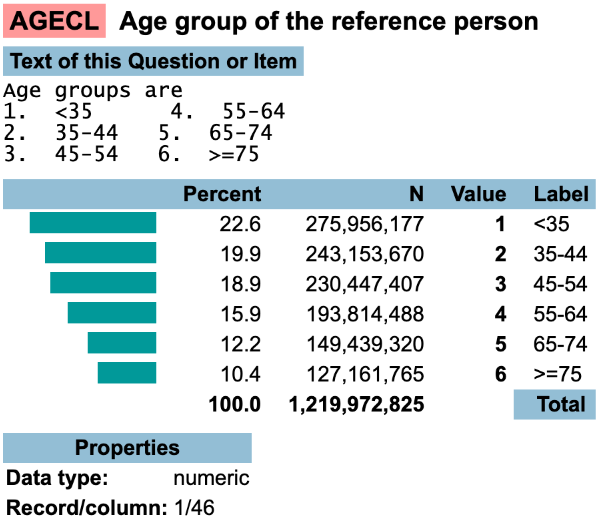!

Isso simplifica o armazenamento de dados, mas não é muito legível para humanos. Então, antes de criarmos uma visualização, vamos criar uma versão dessa coluna que utilize os nomes reais dos grupos.

### Exercício:
Crie uma Series `agecl` que contenha as observações de `"AGECL"` utilizando os nomes reais dos grupos.

In [ ]:
agecl_dict = {
    1: "Under 35",
    2: "35-44",
    3: "45-54",
    4: "55-64",
    5: "65-74",
    6: "75 or Older",
}

age_cl = ...
print("age_cl type:", type(age_cl))
print("age_cl shape:", age_cl.shape)
age_cl.head()

Agora que temos rótulos melhores, vamos criar um gráfico de barras para ver a distribuição etária do nosso grupo.

### Exercício:
Crie um gráfico de barras mostrando a contagem de valores de `age_cl`. Certifique-se de rotular o eixo x como `"Age Group"`, o eixo y como `"Frequency (count)"` e usar o título `"Credit Fearful: Age Groups"`.

In [ ]:
age_cl_value_counts = ...

# Bar plot of `age_cl_value_counts`


Você pode ter notado que, ao criar seus próprios grupos etários, os autores da pesquisa basicamente fizeram um histograma para nós, composto por 6 intervalos. Nosso gráfico nos mostra que muitas das pessoas que temem ser negadas crédito são mais jovens. No entanto, os dois primeiros grupos etários cobrem uma faixa mais ampla do que os outros quatro. Portanto, pode ser útil examinar esses valores de forma mais detalhada para obter uma compreensão mais granular dos dados.

Para isso, precisaremos olhar para uma variável diferente: `"AGE"`. Enquanto `"AGECL"` era uma variável categórica, `"AGE"` é contínua, então podemos usá-la para criar nosso próprio histograma.

### Exercício:
Crie um histograma da coluna `"AGE"` com 10 bins. Certifique-se de rotular o eixo x como `"Age"`, o eixo y como `"Frequency (count)"` e usar o título `"Credit Fearful: Age Distribution"`.

In [ ]:
# Plot histogram of "AGE"


Parece que pessoas mais jovens ainda estão mais preocupadas em conseguir um empréstimo do que pessoas mais velhas, mas as pessoas que estão *mais* preocupadas parecem estar na faixa etária entre 30 e 40 anos.

### RAÇA

Agora que temos uma compreensão de como a idade se relaciona com nosso resultado de interesse, vamos tentar outras possibilidades, começando pela raça. Se olharmos o Livro de Códigos para "RACE", podemos ver que existem 4 categorias.

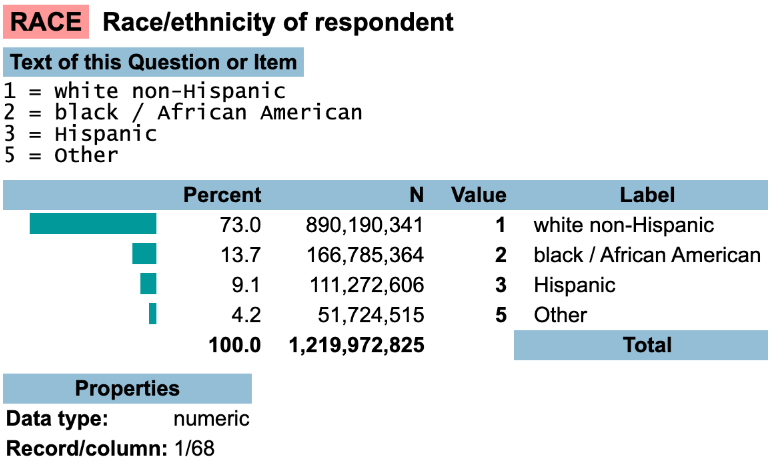

Observe que não há uma categoria 4 aqui. Se um valor para 4 existisse, seria razoável atribuí-lo a "Asiático Americano / Ilhéu do Pacífico" — um grupo que parece não estar representado no conjunto de dados. Esta é uma omissão estranha, mas você frequentemente encontrará que grandes conjuntos de dados públicos têm esses tipos de problemas. O importante é sempre ler o dicionário de dados com atenção.
Neste caso, lembre-se de que este conjunto de dados não fornece uma imagem completa da raça na América — algo que você teria que explicar a qualquer pessoa interessada em sua análise.

### Exercício:
Crie um gráfico de barras horizontal mostrando as contagens normalizadas para `"RACE"`. No seu gráfico, você deve substituir os valores numéricos pelos nomes reais dos grupos. Certifique-se de rotular o eixo x como `"Frequency (%)"`, o eixo y como `"Race"` e usar o título `"Credit Fearful: Racial Groups"`. Por fim, defina o `xlim` para este gráfico como `(0,1)`.

In [ ]:
race_dict = {
    1: "White/Non-Hispanic",
    2: "Black/African-American",
    3: "Hispanic",
    5: "Other",
}
race = ...
race_value_counts = ...
# Create bar chart of race_value_counts

plt.xlim((0, 1))
plt.xlabel("Frequency (%)")
plt.ylabel("Race")
plt.title("Credit Fearful: Racial Groups");

Isso sugere que pessoas brancas/não hispânicas se preocupam mais em serem negadas crédito, mas, pensando criticamente sobre o que estamos vendo, isso pode ser porque há mais pessoas brancas/não hispânicas na população dos Estados Unidos do que em outros grupos raciais, e a amostra para esta pesquisa foi especificamente desenhada para ser representativa da população como um todo.

### Exercício:
Recrie o gráfico de barras horizontal que você acabou de fazer, mas desta vez use o conjunto de dados inteiro `df` em vez do subconjunto `df_fear`. O título deste gráfico deve ser `"SCF Respondents: Racial Groups"`.

In [ ]:
race = ...
race_value_counts = ...
# Create bar chart of race_value_counts

plt.xlim((0, 1))
plt.xlabel("Frequency (%)")
plt.ylabel("Race")
plt.title("SCF Respondents: Racial Groups");

Como este segundo gráfico de barras muda nossa percepção do primeiro? Por um lado, podemos ver que os brancos não hispânicos representam cerca de 70% de todo o conjunto de dados, mas apenas 54% dos respondentes que temem crédito. Por outro lado, os respondentes negros e hispânicos representam 23% de todo o conjunto de dados, mas 40% dos respondentes que têm medo de crédito. Em outras palavras, famílias negras e hispânicas são na verdade *mais* propensas a estarem no grupo que teme crédito.

__Ética de Dados:__ É importante notar que segmentar clientes por raça (ou qualquer outro grupo demográfico) para fins de empréstimos é ilegal nos Estados Unidos. A mesma coisa pode ser legal em outros lugares, mas mesmo que seja, tomar decisões para coisas como empréstimos com base em categorias raciais é claramente antiético. Este é um ótimo exemplo de como pode ser fácil usar ferramentas de ciência de dados para apoiar e propagar sistemas de desigualdade. Embora estejamos "apenas" usando números, a análise estatística *nunca* é neutra, então sempre precisamos pensar criticamente sobre como nosso trabalho será interpretado pelo usuário final.

### Nível de Renda

E quanto ao nível de renda? As pessoas com rendas mais baixas estão preocupadas em serem negadas crédito, ou isso é algo que as pessoas com mais dinheiro se preocupam? Para responder a essa pergunta, precisaremos comparar novamente o conjunto de dados inteiro com nosso subgrupo usando a característica `"INCCAT"`, que captura grupos percentuais de renda. Desta vez, no entanto, faremos um único gráfico de barras lado a lado.

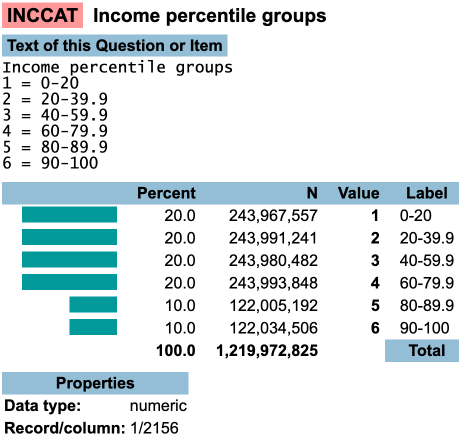

### Exercício:
Crie um DataFrame `df_inccat` que mostre a frequência normalizada para as categorias de renda tanto para as famílias que temem crédito quanto para as famílias que não temem crédito no conjunto de dados. Seu DataFrame final deve parecer algo assim:

```
    TURNFEAR   INCCAT  frequency
0          0   90-100   0.297296
1          0  60-79.9   0.174841
2          0  40-59.9   0.143146
3          0     0-20   0.140343
4          0  21-39.9   0.135933
5          0  80-89.9   0.108441
6          1     0-20   0.288125
7          1  21-39.9   0.256327
8          1  40-59.9   0.228856
9          1  60-79.9   0.132598
10         1   90-100   0.048886
11         1  80-89.9   0.045209
```


In [ ]:
inccat_dict = {
    1: "0-20",
    2: "21-39.9",
    3: "40-59.9",
    4: "60-79.9",
    5: "80-89.9",
    6: "90-100",
}

df_inccat = ...

print("df_inccat type:", type(df_inccat))
print("df_inccat shape:", df_inccat.shape)
df_inccat

### Exercício:
Usando o seaborn, crie um gráfico de barras lado a lado de `df_inccat`. Defina `hue` como `"TURNFEAR"` e certifique-se de que as categorias de renda estejam na ordem correta ao longo do eixo x. Rotule o eixo x como `"Income Category"`, o eixo y como `"Frequency (%)"` e use o título `"Income Distribution: Credit Fearful vs. Non-fearful"`.

In [ ]:
# Create bar chart of `df_inccat`

plt.xlabel("Income Category")
plt.ylabel("Frequency (%)")
plt.title("Income Distribution: Credit Fearful vs. Non-fearful");

Comparando as categorias de renda entre os grupos que temem crédito e os que não temem, podemos ver que as famílias que temem crédito são muito mais comuns nas categorias de renda mais baixas. Em outras palavras, os que temem crédito têm rendas mais baixas.

Então, com base em tudo isso, o que sabemos? Entre as pessoas que responderam que estavam preocupadas em serem aprovadas para crédito após terem sido negadas nos últimos cinco anos, uma pluralidade dos jovens e de baixa renda teve o maior número de respondentes. Isso faz sentido, certo? Jovens tendem a ganhar menos e dependem mais do crédito para iniciar suas vidas, então ter sido negado crédito os deixa mais ansiosos sobre o futuro.

### Ativo

Nem todos os dados são demográficos, no entanto. Se você estivesse trabalhando para um banco, provavelmente se importaria menos com a idade das pessoas e mais com a capacidade delas de suportar mais dívidas. Se fôssemos construir um modelo para isso, precisaríamos estabelecer algumas relações entre as variáveis, e criar algumas matrizes de correlação é um bom ponto de partida.

Primeiro, vamos ampliar um pouco a visão. Estivemos olhando apenas para as pessoas que responderam "sim" quando a pesquisa perguntou sobre `"TURNFEAR"`, mas e se olhássemos para todos? Para começar, vamos trazer um conjunto de dados claro e executar uma única correlação.

### Exercício:
Calcule o coeficiente de correlação para `"ASSET"` e `"HOUSES"` no conjunto de dados inteiro `df`.

In [ ]:
asset_house_corr = ...
print("SCF: Asset Houses Correlation:", asset_house_corr)

Essa é uma correlação positiva moderada, o que provavelmente esperaríamos, certo? Para muitos americanos, o valor de sua residência principal representa a maior parte do valor total de seus ativos. E quanto às pessoas em nosso subconjunto `TURNFEAR`, no entanto? Vamos calcular essa correlação para ver se há diferença.

### Exercício:
Calcule o coeficiente de correlação para `"ASSET"` e `"HOUSES"` no subconjunto de pessoas que têm medo de crédito, `df_fear`.

In [ ]:
asset_house_corr = ...
print("Credit Fearful: Asset Houses Correlation:", asset_house_corr)

Aha! Eles são diferentes! Ainda é apenas uma correlação positiva moderada, mas a relação entre o valor total dos ativos e o valor da residência principal é mais forte para nosso grupo `TURNFEAR` do que para a população como um todo.

Vamos criar matrizes de correlação usando o restante dos dados para `df` e `df_fear` e ver se as diferenças persistem. Aqui, vamos analisar apenas 5 características: `"ASSET"`, `"HOUSES"`, `"INCOME"`, `"DEBT"` e `"EDUC"`.

### Exercício:
Crie uma matriz de correlação usando `df`, considerando apenas as colunas `"ASSET"`, `"HOUSES"`, `"INCOME"`, `"DEBT"` e `"EDUC"`.

In [ ]:
cols = ["ASSET", "HOUSES", "INCOME", "DEBT", "EDUC"]
corr = ...
corr.style.background_gradient(axis=None)

### Exercício:
Crie uma matriz de correlação usando `df_fear`, considerando apenas as colunas `"ASSET"`, `"HOUSES"`, `"INCOME"`, `"DEBT"` e `"EDUC"`.

In [ ]:
corr = ...
corr.style.background_gradient(axis=None)

Uau! Existem algumas diferenças bastante importantes aqui! A relação entre `"DEBT"` (dívida) e `"HOUSES"` (casas) é positiva em ambos os conjuntos de dados, mas enquanto o coeficiente para o `df` é relativamente fraco, com 0,26, o mesmo número para `df_fear` é 0,96.

Lembre-se, quanto mais próximo um coeficiente de correlação estiver de 1,0, mais exatamente as variáveis se correspondem. Nesse caso, isso significa que o valor da residência principal e o total da dívida da família estão se aproximando bastante de serem iguais. Isso sugere que a principal fonte de dívida das pessoas do grupo `"TURNFEAR"` é a residência principal, o que, novamente, é uma descoberta intuitiva.

`"DEBT"` e `"ASSET"` também apresentam uma diferença igualmente marcante, assim como `"EDUC"` (educação) e `"DEBT"`, que, embora não seja tão extrema quanto as outras, ainda é grande o suficiente para chamar a atenção de nosso banqueiro hipotético.

Vamos criar algumas visualizações para mostrar essas relações graficamente.

### Education

Primeiro, vamos começar com os níveis de educação `"EDUC"`, comparando os grupos que têm medo de crédito e os que não têm.

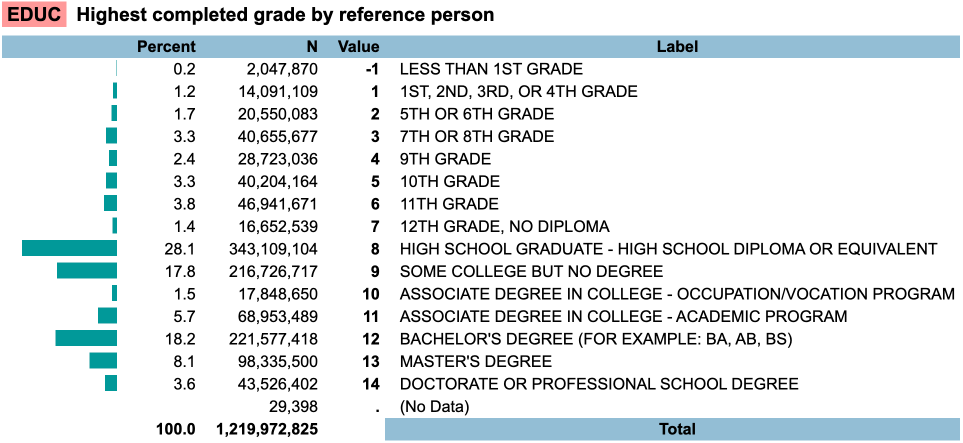

### Exercício:
Crie um DataFrame `df_educ` que mostre a frequência normalizada para as categorias de educação tanto para os lares que têm medo de crédito quanto para os que não têm na base de dados. Isso será semelhante em formato ao `df_inccat`, mas focado na educação. **Nota**: não é necessário substituir os valores numéricos em `"EDUC"` pelos rótulos verdadeiros.

```
    TURNFEAR  EDUC  frequency
0          0    12   0.257481
1          0     8   0.192029
2          0    13   0.149823
3          0     9   0.129833
4          0    14   0.096117
5          0    10   0.051150
...
25         1     5   0.015358
26         1     2   0.012979
27         1     3   0.011897
28         1     1   0.005408
29         1    -1   0.003245
```


In [ ]:
df_educ = ...
print("df_educ type:", type(df_educ))
print("df_educ shape:", df_educ.shape)
df_educ.head()

### Exercício:
Usando o seaborn, crie um gráfico de barras lado a lado de `df_educ`. Defina `hue` como `"TURNFEAR"` e certifique-se de que as categorias de educação estejam na ordem correta ao longo do eixo x. Rotule o eixo x como `"Nível de Educação"`, o eixo y como `"Frequência (%)"` e use o título `"Nível de Educação: Medo de Crédito vs. Não Medo"`.

In [ ]:
# Create bar chart of `df_educ`

plt.xlabel("Education Level")
plt.ylabel("Frequency (%)")
plt.title("Educational Attainment: Credit Fearful vs. Non-fearful");

Neste gráfico, podemos ver que uma proporção muito maior de respondentes que têm medo de crédito possui apenas o diploma de ensino médio, enquanto os diplomas universitários são mais comuns entre os que não têm medo de crédito.

### Dívida

Vamos continuar com alguns gráficos de dispersão que analisam a dívida.

### Exercício:
Use `df` para fazer um gráfico de dispersão mostrando a relação entre `DEBT` e `ASSET`.

In [ ]:
# Create scatter plot of ASSET vs DEBT, df


### Exercício:
Use `df_fear` para fazer um gráfico de dispersão mostrando a relação entre `DEBT` e `ASSET`.

In [ ]:
# Create scatter plot of ASSET vs DEBT, df_fear


Você pode ver que a relação no nosso gráfico `df_fear` é mais plana do que a do gráfico `df`, mas eles claramente são diferentes.

Vamos finalizar com a diferença mais marcante de nossas matrizes e fazer alguns gráficos de dispersão mostrando a diferença entre `HOUSES` e `DEBT`.

### Exercício:
Use `df` para fazer um gráfico de dispersão mostrando a relação entre `HOUSES` e `DEBT`.

In [ ]:
# Create scatter plot of HOUSES vs DEBT, df


E faça o mesmo gráfico de dispersão usando `df_fear`.

### Exercício:
Use `df_fear` para fazer um gráfico de dispersão mostrando a relação entre `HOUSES` e `DEBT`.

In [ ]:
# Create scatter plot of HOUSES vs DEBT, df_fear


Os outliers dificultam um pouco a visualização da diferença entre esses dois gráficos, mas a relação é suficientemente clara: nosso gráfico `df_fear` mostra uma relação linear quase perfeita, enquanto nosso gráfico `df` apresenta algo um pouco mais confuso.

Você também pode notar que os pontos de dados no gráfico `df_fear` formam vários pequenos grupos. Esses são chamados de 'clusters', e falaremos mais sobre como analisar dados agrupados na próxima lição.

# Clustering com Duas Features

Na lição anterior, você explorou dados da Pesquisa de Finanças do Consumidor (SCF), prestando atenção especial às famílias que foram negadas crédito ou temiam ser negadas crédito. Nesta lição, construiremos um modelo para segmentar essas famílias em grupos distintos e examinaremos as diferenças entre esses grupos.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Preparando Dados

## Importação

Assim como sempre, precisamos começar trazendo nossos dados para o projeto. Passamos algum tempo na lição anterior trabalhando com um subconjunto do conjunto de dados maior da SCF chamado `"TURNFEAR"`. Vamos começar com isso.

### Exercício:
Crie uma função `wrangle` que aceite um caminho de um arquivo CSV como entrada, leia o arquivo em um DataFrame, submeta os dados às famílias que foram negadas crédito ou temiam ser negadas crédito nos últimos 5 anos (veja `"TURNFEAR"`), e retorne o DataFrame subset.

In [ ]:
def wrangle(filepath):

    return df

E agora que cuidamos disso, vamos importar os dados e ver o que temos.
### Exercício:
Use sua função `wrangle` para ler o arquivo `SCFP2019.csv.gz` em um DataFrame chamado `df`.

In [ ]:
df = ...

print("df type:", type(df))
print("df shape:", df.shape)
df.head()

## Explorar

Olhamos para muitas características diferentes do subconjunto `"TURNFEAR"` na última lição, e a última coisa que analisamos foi a relação entre imóveis e dívida. Para relembrar como essa relação era, vamos fazer esse gráfico novamente.

### Exercício:
Crie um gráfico de dispersão que mostre o valor total da residência principal de uma família (`"HOUSES"`) como função do valor total da dívida da família (`"DEBT"`). Certifique-se de rotular seu eixo x como `"Household Debt"`, seu eixo y como `"Home Value"` e usar o título `"Credit Fearful: Home Value vs. Household Debt"`.

In [ ]:
# Plot "HOUSES" vs "DEBT"

plt.xlabel("Household Debt [$1M]")
plt.ylabel("Home Value [$1M]")
plt.title("Credit Fearful: Home Value vs. Household Debt");

Se lembra daquele gráfico e seus clusters? Vamos nos aprofundar um pouco mais nele.

## Dividir

Precisamos dividir nossos dados, mas não vamos precisar do vetor alvo ou de um conjunto de teste desta vez. Isso porque o modelo que estaremos construindo envolve aprendizado *não supervisionado*.

É chamado de *não supervisionado* porque o modelo não tenta mapear a entrada para um conjunto de rótulos ou alvos que já existem. É um pouco como os humanos aprendem novas habilidades, já que nem sempre temos modelos para copiar. Às vezes, apenas experimentamos algo e vemos o que acontece. Tenha em mente que isso não torna esses modelos menos úteis, apenas os torna diferentes.

Então, mantendo isso em mente, vamos fazer a divisão.

### Exercício:
Crie a matriz de características `X`. Ela deve conter apenas duas características: `"DEBT"` e `"HOUSES"`.

In [ ]:
X = ...

print("X type:", type(X))
print("X shape:", X.shape)
X.head()

# Construindo Model

Antes de começarmos a construir o modelo, vamos falar um pouco sobre algo chamado `KMeans`.

Dê uma olhada novamente no gráfico de dispersão que fizemos no início desta lição. Lembre-se de como os pontos de dados formam pequenos clusters? Acontece que podemos usar um algoritmo que particiona o conjunto de dados em grupos menores.

Vamos dar uma olhada em como essas coisas funcionam juntas.

## Iterar

Agora que você teve a chance de explorar o processo um pouco, vamos entrar em como construir um modelo que faça a mesma coisa.

### Exercício:
Construa um modelo `KMeans`, atribua-o à variável `model` e ajuste-o aos dados de treinamento `X`.

**Dica:** O algoritmo de agrupamento k-means depende de processos aleatórios, então não se esqueça de definir um *random_state* para todos os seus modelos nesta lição.

In [ ]:
# Build model
model = ...
print("model type:", type(model))

# Fit model to data



E lá está. 42 pontos de dados distribuídos em três clusters. Vamos pegar os rótulos que o modelo atribuiu aos pontos de dados para que possamos começar a criar uma nova visualização.

### Exercício:
Extraia os rótulos que seu `model` criou durante o treinamento e atribua-os à variável `labels`.

In [ ]:
labels = ...
print("labels type:", type(labels))
print("labels shape:", labels.shape)
labels[:10]

Usando os rótulos que acabamos de extrair, vamos recriar o gráfico de dispersão de antes. Desta vez, coloriremos cada ponto de acordo com o cluster ao qual o modelo o atribuiu.

### Exercício:
Recrie o gráfico de dispersão "Home Value vs. Household Debt" que você fez acima, mas com duas alterações. Primeiro, use o seaborn para criar o gráfico. Segundo, passe seus `labels` para o argumento `hue` e defina o argumento `palette` como `"deep"`.

In [ ]:
# Plot "HOUSES" vs "DEBT" with hue=label

plt.xlabel("Household Debt [$1M]")
plt.ylabel("Home Value [$1M]")
plt.title("Credit Fearful: Home Value vs. Household Debt");

Ótimo! Cada cluster tem sua própria cor. Os centróides ainda estão faltando, então vamos extraí-los.

### Exercício:
Extraia os centróides que seu `model` criou durante o treinamento e atribua-os à variável `centroids`.

In [ ]:
centroids = ...
print("centroids type:", type(centroids))
print("centroids shape:", centroids.shape)
centroids

Vamos adicionar os centróides ao gráfico.

### Exercício:
Recrie o gráfico de dispersão "Home Value vs. Household Debt" que você acabou de fazer, mas com uma diferença: adicione os `centroids` ao gráfico. Certifique-se de definir a cor dos centróides como `"gray"`.

In [ ]:
# Plot "HOUSES" vs "DEBT", add centroids

plt.xlabel("Household Debt [$1M]")
plt.ylabel("Home Value [$1M]")
plt.title("Credit Fearful: Home Value vs. Household Debt");

Isso parece ótimo, mas ainda não é hora de nos elogiarmos. Embora nosso gráfico faça parecer que os clusters estão corretamente atribuídos, como cientistas de dados, precisamos de uma avaliação numérica. Os dados que estamos usando são bastante claros, mas se as coisas estivessem um pouco mais confusas, precisaríamos realizar alguns cálculos para garantir que fizemos tudo certo.

Existem duas métricas que usaremos para avaliar nossos clusters. Começaremos com **inertia**, que mede a distância entre os pontos *dentro do mesmo cluster*.

**Pergunta:** O que significam aquelas barras duplas na equação?

**Resposta:** É a *norma L2*, ou seja, a distância euclidiana não negativa entre cada ponto de dados e seu centróide. Em Python, seria algo como

`sqrt((x1-c)**2 + (x2-c)**2 + ...)`


### Exercício:
Extraia a inércia do seu `model` e atribua-a à variável `inertia`.

In [ ]:
inertia = ...
print("inertia type:", type(inertia))
print("Inertia (3 clusters):", inertia)

A "melhor" inércia é 0, e nossa pontuação está bastante distante disso. Isso significa que nosso modelo é "ruim"? Não necessariamente. A inércia é uma medida de distância (como o erro absoluto médio).

Isso significa que a unidade de medida para a inércia depende da unidade de medida dos nossos eixos x e y. E como `"DEBT"` e `"HOUSES"` são medidos em dezenas de milhões de dólares, não é surpreendente que a inércia seja tão grande.

No entanto, seria útil ter uma métrica que fosse mais fácil de interpretar, e é aí que entra o **silhouette score**. O silhouette score mede a distância *entre diferentes clusters*. Ele varia de -1 (o pior) a 1 (o melhor), tornando-se mais fácil de interpretar do que a inércia.

### Exercício:
Calcule o silhouette score para seu modelo e atribua-o à variável `ss`.

In [ ]:
ss = ...
print("ss type:", type(ss))
print("Silhouette Score (3 clusters):", ss)

Excelente! 0,976 está bem perto de 1, então nosso modelo fez um bom trabalho ao identificar 3 clusters que estão distantes uns dos outros.

É importante lembrar que essas métricas de desempenho são o resultado do número de clusters que dissemos ao nosso modelo para criar. Em aprendizado não supervisionado, o número de clusters é um hiperparâmetro que você define antes de treinar seu modelo. Então, o que aconteceria se mudássemos o número de clusters? Isso levaria a um melhor desempenho? Vamos tentar!

### Exercício:
Use um loop `for` para construir e treinar um modelo K-Means onde `n_clusters` varia de 2 a 12 (inclusive). Cada vez que um modelo é treinado, calcule a inércia e adicione-a à lista `inertia_errors`, em seguida, calcule o silhouette score e adicione-o à lista `silhouette_scores`.

In [ ]:
n_clusters = ...
inertia_errors = ...
silhouette_scores = ...

# Add `for` loop to train model and calculate inertia, silhouette score.


print("inertia_errors type:", type(inertia_errors))
print("inertia_errors len:", len(inertia_errors))
print("Inertia:", inertia_errors)
print()
print("silhouette_scores type:", type(silhouette_scores))
print("silhouette_scores len:", len(silhouette_scores))
print("Silhouette Scores:", silhouette_scores)

Agora que temos ambas as métricas de desempenho para várias configurações diferentes de `n_clusters`, vamos fazer alguns gráficos de linha para ver a relação entre o número de clusters em um modelo e suas inércias e scores de silhouette.

### Exercício:
Crie um gráfico de linha que mostre os valores de `inertia_errors` como uma função de `n_clusters`. Certifique-se de rotular seu eixo x como `"Number of Clusters"`, seu eixo y como `"Inertia"` e usar o título `"K-Means Model: Inertia vs Number of Clusters"`.

In [ ]:
# Plot `inertia_errors` by `n_clusters`


O que estamos vendo aqui é que, à medida que o número de clusters aumenta, a inércia diminui. De fato, poderíamos chegar à inércia de 0 se dissessem ao nosso modelo para criar 4.623 clusters (o mesmo número de observações em `X`), mas esses clusters não seriam úteis para nós.

A dica para escolher o número certo de clusters é procurar pela "curva do cotovelo" neste gráfico. Em outras palavras, queremos escolher o ponto onde a queda na inércia se torna menos dramática e a linha começa a se achatar. Neste caso, parece que o ponto ideal é 4 ou 5.

Vamos ver como fica o silhouette score.

### Exercício:
Crie um gráfico de linha que mostre os valores de `silhouette_scores` como uma função de `n_clusters`. Certifique-se de rotular seu eixo x como `"Number of Clusters"`, seu eixo y como `"Silhouette Score"` e usar o título `"K-Means Model: Silhouette Score vs Number of Clusters"`.

In [ ]:
# Plot `silhouette_scores` vs `n_clusters`


Observe que, ao contrário do nosso gráfico de inércia, quanto maior, melhor. Portanto, não estamos procurando uma "curva do cotovelo", mas sim um número de clusters para o qual o silhouette score ainda permanece alto. Podemos ver que o silhouette score cai drasticamente além de 4 clusters. Dado isso e o que vimos no gráfico de inércia, parece que o número ideal de clusters é 4.

Agora que decidimos sobre o número final de clusters, vamos construir um modelo final.

### Exercício:
Construa e treine um novo modelo k-means chamado `final_model`. Use as informações que você obteve dos dois gráficos acima para definir um valor apropriado para o argumento `n_clusters`. Depois de construir e treinar seu modelo, envie-o para o avaliador para avaliação.

In [ ]:
# Build model
final_model = ...
print("final_model type:", type(final_model))

# Fit model to data



Se deve estar se perguntando, 'porque não precisamos de uma seção *Avaliar* neste notebook'.

Porque não temos dados de teste para avaliar nosso modelo.

# Comunicar Resultados

### Exercício:
Crie um último gráfico de dispersão "Home Value vs. Household Debt" que mostre os clusters que seu `final_model` atribuiu aos dados de treinamento.

In [ ]:
# Plot "HOUSES" vs "DEBT" with final_model labels

plt.xlabel("Household Debt [$1M]")
plt.ylabel("Home Value [$1M]")
plt.title("Credit Fearful: Home Value vs. Household Debt");

Legal! Você pode ver todos os quatro clusters, cada um diferenciado dos demais pela cor.

Vamos fazer mais uma visualização, convertendo a análise de cluster que acabamos de realizar em algo um pouco mais acionável: um gráfico de barras lado a lado. Para fazer isso, precisamos colocar nossos dados agrupados em um DataFrame.

### Exercício:
Crie um DataFrame `xgb` que contenha os valores médios de `"DEBT"` e `"HOUSES"` para cada um dos clusters em seu `final_model`.

In [ ]:
xgb = ...

print("xgb type:", type(xgb))
print("xgb shape:", xgb.shape)
xgb

Antes de você passar para a próxima tarefa, imprima os `cluster_centers_` do seu `final_model`. Você vê alguma semelhança entre eles e o DataFrame que você acabou de criar? Por que você acha que isso acontece?

### Exercício:
Crie um gráfico de barras lado a lado a partir de `xgb` que mostre os valores médios de `"DEBT"` e `"HOUSES"` para cada um dos clusters em seu `final_model`. Para facilitar a leitura, você deve dividir os valores em `xgb` por 1 milhão. Certifique-se de rotular o eixo x como `"Cluster"`, o eixo y como `"Value [$1 million]"`, e usar o título `"Mean Home Value & Household Debt by Cluster"`.

In [ ]:
# Create side-by-side bar chart of `xgb`

plt.xlabel("Cluster")
plt.ylabel("Value [$1 million]")
plt.title("Mean Home Value & Household Debt by Cluster");

Neste gráfico, temos nossos quatro clusters espalhados ao longo do eixo x, e os valores em dólares para o valor da casa e a dívida das famílias no eixo y.

A primeira coisa a observar neste gráfico são os diferentes valores médios das casas para os cinco clusters. O cluster 0 representa lares com valores de casa pequenos a moderados, os clusters 2 e 3 têm valores de casa altos, e o cluster 1 possui valores extremamente altos.

A segunda coisa a observar é a proporção da dívida em relação ao valor da casa. Nos clusters 1 e 3, essa proporção está em torno de 0,5. Isso sugere que esses grupos têm uma quantidade moderada de patrimônio não utilizado em suas casas. Mas para o grupo 0, essa proporção é quase 1, o que sugere que a maior fonte de dívida das famílias é a hipoteca. O grupo 2 é único porque tem a menor proporção de dívida em relação ao valor da casa, em torno de 0,4.

Essas informações podem ser úteis para instituições financeiras que desejam direcionar produtos para clientes que atendam a suas necessidades. Por exemplo, lares do grupo 0 podem estar interessados em refinanciar sua hipoteca para reduzir sua taxa de juros. As famílias do grupo 2 poderiam se interessar por uma linha de crédito com garantia de imóvel porque possuem mais patrimônio em suas casas. E os banqueiros, Bill Gates e Beyoncé do grupo 1 podem querer uma gestão de riqueza personalizada e de alto padrão.